In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
import seaborn
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from langdetect import detect
%matplotlib inline

In [2]:
df = pd.read_csv('Shoes_Data.csv')

In [3]:
df

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,₹279.00,2.9 out of 5 stars,2389 ratings,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men
1,Bourge Men's Loire-z126 Running Shoes,₹479.00,3.9 out of 5 stars,11520 ratings,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men
2,T-Rock Men's Sneaker,₹430.00,3.3 out of 5 stars,1251 ratings,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
3,Robbie jones Sneakers Casual Canvas Fabric Col...,₹499.00,4.2 out of 5 stars,3 ratings,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men
4,Sparx Men's Sd0323g Sneakers,₹499.00,4.2 out of 5 stars,20110 ratings,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
...,...,...,...,...,...,...,...,...
1225,Nike Men's React Vision Running Shoes,₹7256.00,4.4 out of 5 stars,200 ratings,The Nike react vision is a STORY of surreal co...,Must buy|| not have a great fiting but great q...,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Women
1226,Puma Men's B.O.G Limitless Hi Evoknit Sneakers,₹5822.00,4.3 out of 5 stars,25 ratings,The B.O.G limitless is Puma's key style for th...,Worth buying !|| Classy Bold and Stylish !!|| ...,4.0 out of 5 stars|| 5.0 out of 5 stars|| 3.0 ...,Women
1227,new balance Women's FuelCell Echolucent Runnin...,₹5362.00,4.5 out of 5 stars,817 ratings,Lead the pack in New Balance’s Echolucent snea...,size variation in product recd n size chart|| ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Women
1228,Nike Women's WMNS Air Zoom Pegasus 37 Running ...,₹7480.00,4.5 out of 5 stars,67 ratings,Nike మహిళల రన్నింగ్ షూ ఫీల్స్ మరియు రూపం మృదువ...,Verified Purchase|| Verified Purchase|| Verifi...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 4.0 ...,Women


Преобразую числовые столбики в числа (откидываю кое-где части, т.к. они нули везде)

In [ ]:
df['rating'] = [float(row.split()[0]) for row in df['rating']]

for ind, row in enumerate(df['reviews_rating']):
    splitted_row = row.split('|| ')
    score = []
    for review in splitted_row:
        review = int(review[0:1])
        score.append(review)
    df['reviews_rating'][ind] = score

In [5]:
df['price'] = [float(row[1:].split('.')[0]) for row in df['price']]

А также разобью отзывы на один продукт на отдельные отзывы

In [ ]:
for ind, row in enumerate(df['reviews']):
    splitted_row = row.split('|| ')
    score = []
    for review in splitted_row:
        score.append(review)
    df['reviews'][ind] = score

In [7]:
df

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,279.0,2.9,2389 ratings,Elevate your style with this classy pair of Ru...,"[Not happy with product, It's not as expected....","[1, 1, 3, 3, 3, 2, 1, 2, 1, 1]",Men
1,Bourge Men's Loire-z126 Running Shoes,479.0,3.9,11520 ratings,The product will be an excellent pick for you....,[Memory cushioning in these shoes is the best ...,"[5, 1, 5, 5, 4, 5, 5, 5, 4, 5]",Men
2,T-Rock Men's Sneaker,430.0,3.3,1251 ratings,Flaunt with these stylish and unique red casua...,"[Worth to its amount, Go for it, Perfect, 5 st...","[5, 5, 5, 5, 1, 1, 5, 4, 1, 1]",Men
3,Robbie jones Sneakers Casual Canvas Fabric Col...,499.0,4.2,3 ratings,Robbie Jones Shoes Are Designed To Keeping In ...,"[Sup quality, Good but not expected, Awesome 👌.!]","[5, 3, 5]",Men
4,Sparx Men's Sd0323g Sneakers,499.0,4.2,20110 ratings,Sparx is a spectacular range of footwear from ...,"[Best, Satisfied!, Affordable beauty 😘😘😘😘 the ...","[5, 5, 5, 5, 5, 5, 1, 3, 2, 5]",Men
...,...,...,...,...,...,...,...,...
1225,Nike Men's React Vision Running Shoes,7256.0,4.4,200 ratings,The Nike react vision is a STORY of surreal co...,"[Must buy, not have a great fiting but great q...","[5, 3, 5, 5, 5, 5, 5, 2, 4, 5]",Women
1226,Puma Men's B.O.G Limitless Hi Evoknit Sneakers,5822.0,4.3,25 ratings,The B.O.G limitless is Puma's key style for th...,"[Worth buying !, Classy Bold and Stylish !!, N...","[4, 5, 3, 5, 5, 5, 5, 5, 5, 5]",Women
1227,new balance Women's FuelCell Echolucent Runnin...,5362.0,4.5,817 ratings,Lead the pack in New Balance’s Echolucent snea...,"[size variation in product recd n size chart, ...","[5, 5, 5, 5, 1, 5, 3, 2, 5, 5]",Women
1228,Nike Women's WMNS Air Zoom Pegasus 37 Running ...,7480.0,4.5,67 ratings,Nike మహిళల రన్నింగ్ షూ ఫీల్స్ మరియు రూపం మృదువ...,"[Verified Purchase, Verified Purchase, Verifie...","[5, 5, 4, 5, 5, 5, 5, 3, 5, 1]",Women


In [8]:
df = df.drop(['total_reviews'], axis=1)
df = df.drop(['Shoe Type'], axis=1)

Сразу уберу неанлийский язык, потому что размер дф не оч большой, так что лангдетек простой и удобный способ

In [9]:
for ind, descr in enumerate(df['product_description']):
    try:
        if detect(descr) != 'en':
            df = df.drop(ind)
    except: # может быть LangDetectException, но она не встает на место исключения как ошибка
        pass
df = df.reset_index(drop=True)

Средний рейтинг тяготеет к 4, цена к 2000

In [10]:
df.describe()

,price,rating
count,1177.000000,1177.000000
mean,1964.823280,3.955310
std,1681.285015,0.460377
min,127.000000,1.000000
25%,608.000000,3.800000
50%,1509.000000,4.000000
75%,2748.000000,4.200000
max,7992.000000,5.000000


У цен есть заметные выбросы в высоком ценовом сегменте. Предполагаю, что для модели это создат трудности

<AxesSubplot:>

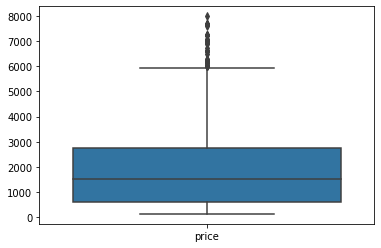

In [13]:
import seaborn as sns

sns.boxplot(data=df[['price']])

Рейтинги сосредоточены в 3-5 баллах, с выбросами в 1

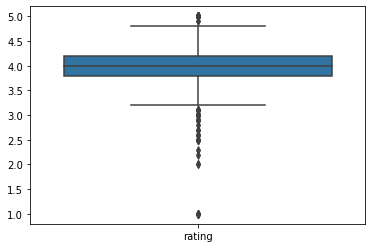

In [14]:
ax = sns.boxplot(data=df[['rating']])

Я бы не назвал распределение оценок нормальным, но ничего критичного.

<AxesSubplot:>

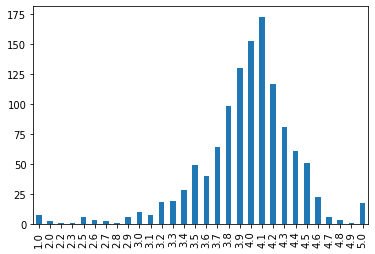

In [15]:
df['rating'].value_counts().sort_index().plot.bar()

А вот распределение цен сосредоточено в диапозоне 100-1000 евро.<br>
Могу предположить, что для дорогих товаров будут какие-то специальные слова.<br>
Или наоборот, дорогие товары не смогут предсказываться.

<AxesSubplot:>

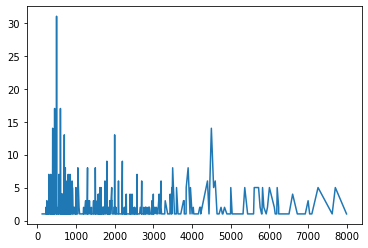

In [16]:
df['price'].value_counts().sort_index().plot()

Длина описания ожидаема похожа на другие графики.<p>

In [17]:
df['product_description_len'] = [len(descr) for descr in df['product_description']]

<AxesSubplot:>

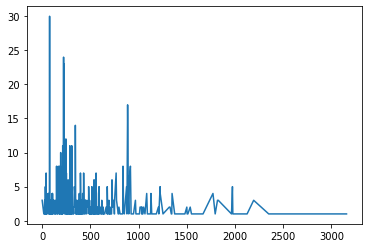

In [18]:
df['product_description_len'].value_counts().sort_index().plot()

Длина отзывов обычно короткая, но с выбросами по несколько тысяч знаков

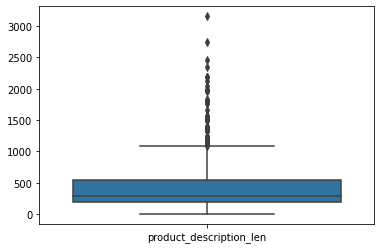

In [19]:
ax = sns.boxplot(data=df[['product_description_len']])

Корреляции довольно интересные (но они очень слабые!).<p>
Чем больше цена, тем больше рейтинг.<p>
Чем больше отзывов, тем меньше цена (массовость продукта)<p>
Но чем больше пишут про продукт (в длине), тем он дороже.

In [20]:
df.corr()

,price,rating,product_description_len
price,1.000000,0.206363,0.101196
rating,0.206363,1.000000,0.028356
product_description_len,0.101196,0.028356,1.000000


Подготовлю раздел описания. Очищу стопслова, лемматзирую. Мне кажется, вполне достаточно, это позволит найти уникальные слова для групп отзывов.

In [21]:
from string import punctuation
punctuation += '...' + '—' + '…' + '«»'
import nltk
from nltk.corpus import stopwords
import re
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RepeatedKFold, GridSearchCV

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\trekc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from tqdm import tqdm


for ind, descr in tqdm(enumerate(df['product_description'])):
    descr = [word.lower().strip().strip(punctuation) for word in nltk.word_tokenize(descr)]
    descr = [lemmatizer.lemmatize(w) for w in descr]
    descr = [word for word in descr if word != '' or word != ' ']
    descr = ' '.join([x for x in descr if x not in stopwords.words('english')])   
    df['product_description'][ind] = descr
    if df['product_description'][ind] == '':
        df = df.drop(ind)

df = df.reset_index(drop=True)

Train либо автоматом ставится, либо 0.75, т.к. довольно мало данных

In [127]:
corpus = []
for row in df['product_description']:
    corpus.append(row)

In [ ]:
y = np.array(df['price'])

In [ ]:
vect1 = CountVectorizer()
X1 = vect1.fit_transform(corpus)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.70, random_state=42)

In [ ]:
vect = TfidfVectorizer()
X = vect.fit_transform(corpus)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=42)

### Функция скоринга

In [25]:
from sklearn.metrics import *
def scoring(y_test, y_pred):
    print('MRSE (0 is better): ', mean_squared_error(y_test, y_pred, squared=False))
    print('MAE (0 is better): ', mean_absolute_error(y_test, y_pred))
    print('EVS (1 is better): ', explained_variance_score(y_test, y_pred)) # 1 is better
    print('ME (0 is better): ', max_error(y_test, y_pred)) #shock
    print('R2 (1 is better): ', r2_score(y_test, y_pred)) # 1 is better
    print('MAPE (0 is better): ', mean_absolute_percentage_error(y_test, y_pred)) # 0 is better

In [26]:
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=3,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

Далее будет проблема того, как сказать модели, что нельзя негативные значения. Я хз

# LR

In [190]:
# почему-то возникала ошибка UserWarning:
# One or more of the test scores are non-finite
# но в трейне нет таких значений
import warnings
warnings.filterwarnings("ignore")

def LR(X_train, y_train):
    model = LinearRegression()

    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

    space = dict()
    space['fit_intercept'] = [True, False]
    space['positive'] = [True, False]
    space['normalize'] = [True, False]

    search = GridSearchCV(model, space, scoring='r2', n_jobs=-1, cv=cv)

    result = search.fit(X_train, y_train)

    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)

In [191]:
LR(X_train, y_train)

Best Score: 0.3187162665393739
Best Hyperparameters: {'fit_intercept': False, 'normalize': True, 'positive': False}


In [192]:
LR(X1_train, y1_train)

Best Score: -0.32124550610473623
Best Hyperparameters: {'fit_intercept': False, 'normalize': True, 'positive': False}


In [193]:
lr_TFIDF = LinearRegression(fit_intercept=False, normalize=True, positive=False).fit(X_train, y_train)
lr_TFIDF_pred = lr_TFIDF.predict(X_test)
scoring(y_test, lr_TFIDF_pred)
get_cv_scores(lr_TFIDF)

MRSE (0 is better):  1217.1538467044336
MAE (0 is better):  726.9333758895817
EVS (1 is better):  0.4872007071112887
ME (0 is better):  6664.6059910350705
R2 (1 is better):  0.4669741204367742
MAPE (0 is better):  0.5540635856995185
CV Mean:  0.3749972658051839
STD:  0.09080837642770187




In [194]:
lr_BoW = LinearRegression(fit_intercept=False, normalize=True, positive=False).fit(X1_train, y1_train)
lr_BoW_pred = lr_BoW.predict(X1_test)
scoring(y1_test, lr_BoW_pred)
get_cv_scores(lr_BoW)

MRSE (0 is better):  1701.4726314872394
MAE (0 is better):  1047.1448577232088
EVS (1 is better):  -0.040466645379102495
ME (0 is better):  15217.823877966628
R2 (1 is better):  -0.04161512872375184
MAPE (0 is better):  0.9749145697361739
CV Mean:  0.3749972658051839
STD:  0.09080837642770187




# Ridge

In [195]:
def RG(X_train, y_train):
    model = Ridge()
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

    space = dict()
    space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
    space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
    space['fit_intercept'] = [True, False]
    space['normalize'] = [True, False]

    search = GridSearchCV(model, space, scoring='r2', n_jobs=-1, cv=cv)
    result = search.fit(X_train, y_train)
    
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)

In [196]:
RG(X_train, y_train)

Best Score: 0.5939897390400513
Best Hyperparameters: {'alpha': 0.1, 'fit_intercept': True, 'normalize': False, 'solver': 'sag'}


In [197]:
RG(X1_train, y1_train)

Best Score: 0.4940560648773124
Best Hyperparameters: {'alpha': 10, 'fit_intercept': True, 'normalize': False, 'solver': 'sag'}


In [207]:
ridge_TFIDF = Ridge(alpha=0.1, fit_intercept=True, normalize=False, solver='sag').fit(X_train, y_train)
ridge_TFIDF_pred = ridge_TFIDF.predict(X_test)
scoring(y_test, ridge_TFIDF_pred)
get_cv_scores(ridge_TFIDF)

MRSE (0 is better):  1078.7675752551172
MAE (0 is better):  707.5466779789393
EVS (1 is better):  0.5813583253248744
ME (0 is better):  5432.236064657562
R2 (1 is better):  0.5812902131574317
MAPE (0 is better):  0.6360846273672415
CV Mean:  0.552768467885747
STD:  0.06259977647072519




In [208]:
ridge_BoW = Ridge(alpha=10, fit_intercept=True, normalize=False, solver='sag').fit(X1_train, y1_train)
ridge_BoW_pred = ridge_BoW.predict(X1_test)
scoring(y1_test, ridge_BoW_pred)
get_cv_scores(ridge_BoW)

MRSE (0 is better):  1126.431871394959
MAE (0 is better):  775.1630841188845
EVS (1 is better):  0.5449294218626095
ME (0 is better):  6136.407856588915
R2 (1 is better):  0.5434722266529648
MAPE (0 is better):  0.7058360936299258
CV Mean:  0.21893189168007876
STD:  0.016530853767925718




# Lasso

Я взял все параметры, но кроме альфы ничего не важно.
Использовал R2, потому что при логарифме модель не работает.

In [209]:
from sklearn.linear_model import Lasso

def lss(X_train, y_train):
    model = Lasso()
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

    space = dict()
    #space['positive'] = [True, False]
    space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
    #space['fit_intercept'] = [True, False]
    #space['normalize'] = [True, False]
    #space['precompute'] = [True, False]
    #space['selection'] = ['cyclic', 'random']

    search = GridSearchCV(model, space, scoring='r2', n_jobs=-1, cv=cv)
    result = search.fit(X_train, y_train)

    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)

In [210]:
lss(X_train, y_train)

Best Score: 0.5747128261823573
Best Hyperparameters: {'alpha': 1}


In [211]:
lss(X1_train, y1_train)

Best Score: 0.4014293077165
Best Hyperparameters: {'alpha': 10}


In [212]:
lasso_TFIDF = Lasso(alpha=1).fit(X_train, y_train)
lasso_TFIDF_pred = lasso_TFIDF.predict(X_test)
scoring(y_test, lasso_TFIDF_pred)
get_cv_scores(lasso_TFIDF)

MRSE (0 is better):  1119.9109309624018
MAE (0 is better):  743.6243025401566
EVS (1 is better):  0.553894510813479
ME (0 is better):  6435.94818820837
R2 (1 is better):  0.5487426270342637
MAPE (0 is better):  0.6099685167458548
CV Mean:  0.5282504010192534
STD:  0.07865266857930756




In [219]:
lasso_BoW = Lasso(alpha=1).fit(X1_train, y1_train)
lasso_BoW_pred = lasso_BoW.predict(X1_test)
scoring(y1_test, lasso_BoW_pred)
get_cv_scores(lasso_BoW)

MRSE (0 is better):  1500.5256385952694
MAE (0 is better):  935.1438493074423
EVS (1 is better):  0.19002155468489867
ME (0 is better):  8595.030179018377
R2 (1 is better):  0.18988964350997595
MAPE (0 is better):  0.9353370779231497
CV Mean:  0.5282504010192534
STD:  0.07865266857930756




# Elastic

In [215]:
from sklearn.linear_model import ElasticNet

def els(X_train, y_train):
    model = ElasticNet()
    param_grid = dict()
    param_grid['alpha'] = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    param_grid['l1_ratio'] = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    #param_grid['fit_intercept'] = [True, False]
    #param_grid['normalize'] = [True, False]
    #param_grid['precompute'] = [True, False]
    #param_grid['selection'] = ['cyclic', 'random']
    #param_grid['positive'] = [True, False]

    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
    grid_result = grid.fit(X_train, y_train)
    print('Best Score: ', grid_result.best_score_)
    print('Best Params: ', grid_result.best_params_)

In [216]:
els(X_train, y_train)

Fitting 5 folds for each of 77 candidates, totalling 385 fits
Best Score:  0.5195123932388629
Best Params:  {'alpha': 0.01, 'l1_ratio': 0.9}


In [217]:
els(X1_train, y1_train)

Fitting 5 folds for each of 77 candidates, totalling 385 fits
Best Score:  0.4256168203561871
Best Params:  {'alpha': 0.1, 'l1_ratio': 0.5}


In [221]:
elastic_TFIDF = ElasticNet(alpha=0.01, l1_ratio=0.9).fit(X_train, y_train)
elastic_TFIDF_pred = elastic_TFIDF.predict(X_test)
scoring(y_test, elastic_TFIDF_pred)
get_cv_scores(elastic_TFIDF)

MRSE (0 is better):  1089.6583004464705
MAE (0 is better):  740.4811560543449
EVS (1 is better):  0.5729649471014948
ME (0 is better):  5536.312830039546
R2 (1 is better):  0.5727933480410341
MAPE (0 is better):  0.6702101392021252
CV Mean:  0.5513654878976186
STD:  0.05994427611794965




In [220]:
elastic_BoW = ElasticNet(alpha=0.1, l1_ratio=0.5).fit(X1_train, y1_train)
elastic_BoW_pred = elastic_BoW.predict(X1_test)
scoring(y1_test, elastic_BoW_pred)
get_cv_scores(elastic_BoW)

MRSE (0 is better):  1141.8074191348967
MAE (0 is better):  805.4118970010949
EVS (1 is better):  0.531973462971844
ME (0 is better):  5964.047508885765
R2 (1 is better):  0.5309241602392748
MAPE (0 is better):  0.7578541014307943
CV Mean:  0.19842383033892555
STD:  0.015619510394831539




TF IDF лучше по всем показателям, поэтому буду рассматривать дальше только его

По показателям лучшая модель <b>Ridge</b>, <b>Lasso</b> и <b>Elastic</b>. Без понятия, почему именно они справились лучше (нам не поясняли про эти модели), но, учитывая, что на самом деле все модели показали схожий результат, это не так важно.

In [222]:
ridge_df={'price': ridge_TFIDF_pred}
lr_df={'price': lr_TFIDF_pred}
lasso_df={'price': lasso_TFIDF_pred}
elastic_df={'price': elastic_TFIDF_pred}

In [223]:
ridge_df = pd.DataFrame.from_dict(ridge_df)
lr_df = pd.DataFrame.from_dict(lr_df)
lasso_df = pd.DataFrame.from_dict(lasso_df)
elastic_df = pd.DataFrame.from_dict(elastic_df)

Если сравнивать с исходными данными, то результаты очень даже ничего.<br>
Основная масса данных в 1-3к, выбросы после 6к<br>
Основной массив данных чуть сузился, выбросов стало поменьше (но они не исчезли - то есть модель умеет их предсказывать, что очень даже хорошо)! <br>
Все модели справляются хорошо, но поточнее будет Ridge, Lasso и Elastic.

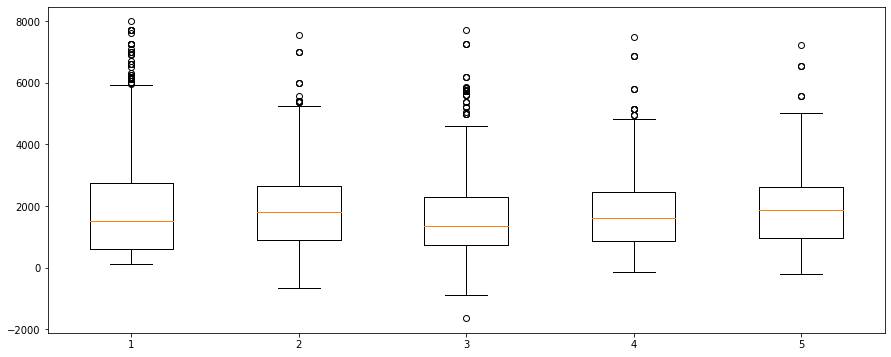

In [224]:
plt.figure(figsize=(15, 6))
plt.boxplot([df['price'], ridge_df['price'], lr_df['price'], lasso_df['price'], elastic_df['price']])
plt.show()

Если посмотреть на линейный график, то все в принципе тоже похоже. Но я предположу, что все же небольшие выбросы моя модель не всегда угадывает, поэтому общий результат не очень.<br>
Пик между 4-5к более или менее уловила вышеупомянутая троица:

<AxesSubplot:>

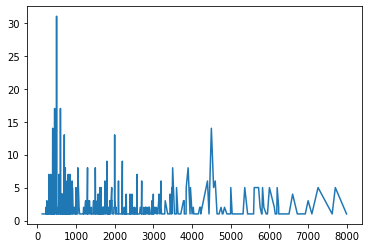

In [225]:
df['price'].value_counts().sort_index().plot()

<AxesSubplot:>

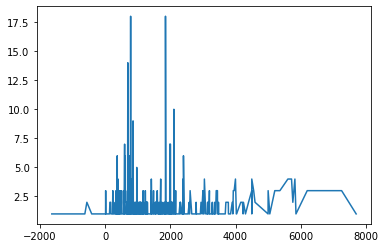

In [226]:
lr_df['price'].value_counts().sort_index().plot()

<AxesSubplot:>

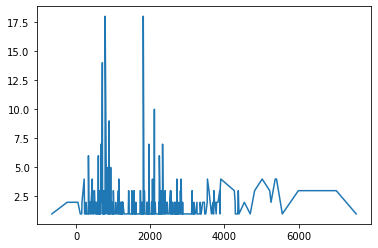

In [227]:
ridge_df['price'].value_counts().sort_index().plot()

<AxesSubplot:>

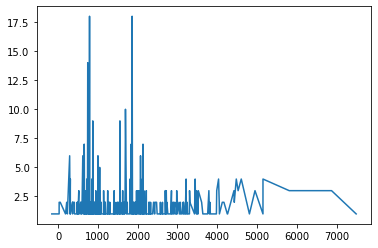

In [228]:
lasso_df['price'].value_counts().sort_index().plot()

<AxesSubplot:>

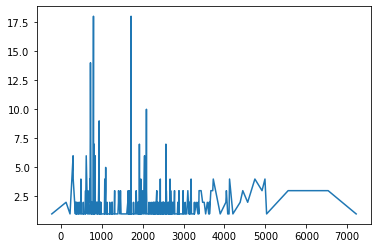

In [229]:
elastic_df['price'].value_counts().sort_index().plot()

Все модели предсказали отрицательные значения, но лучше всего справилось Lasso:

In [230]:
print(df['price'].min())
print(ridge_df['price'].min())
print(lr_df['price'].min())
print(lasso_df['price'].min())
print(elastic_df['price'].min())

127.0
-653.9577827987227
-1637.5379813426387
-156.26997884167213
-220.9391017857629


С макс значениями все близки, но получше будет линейная регрессия.

In [231]:
print(df['price'].max())
print(ridge_df['price'].max())
print(lr_df['price'].max())
print(lasso_df['price'].max())
print(elastic_df['price'].max())

7992.0
7549.6313568229725
7702.000063601798
7493.017064027715
7218.246686511648


Я бы выбрал <b>Ridge</b>, потому что в общем плане он же все же ближе к истине, судя по графикам. Да и оценки модели у него почти лучшие.<br> Хотя, от раза в раз, показатели меняются, и иногда лучше себя показывает <b>Elastic</b> или <b>Lasso</b>

* Улучшить модели можно было бы, если сказать им, что нельзя предсказывать отрицательные значения
* Можно иначе лемматизировать (не убирать стопслова, например)

Слабые места: <br>
* Отрицательные значения
* Выбросы <p>

Сильные места: <br>
* В общем предсказывает правильно
* Некоторые высокие цены все же отгадала

# Часть 2

Конвертирую дф во что-то более удобное

In [46]:
df2 = df[['reviews', 'reviews_rating']].copy()

In [47]:
revs = list()
revs = [rev for li in df2['reviews'] for rev in li]

rats = list()
rats = [rev for li in df2['reviews_rating'] for rev in li]

In [48]:
df2 = pd.DataFrame(list(zip(revs, rats)),
                  columns=['reviews', 'reviews_rating'])

In [49]:
df2

,reviews,reviews_rating
0,Not happy with product,1
1,It's not as expected.,1
2,AVERAGE PRODUCT,3
3,Pic more beautiful,3
4,Got damage product. But quality is average for...,3
...,...,...
9570,Go for it!,5
9571,Excellent product,5
9572,Nice shoe,5
9573,Nice,5


Что можно сказать? Обычно оценки либо очень хорошие, либо очень плохие. Но истина как всегда чуть больше середины

In [50]:
df2.describe()

,reviews_rating
count,9575.000000
mean,3.763446
std,1.531345
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


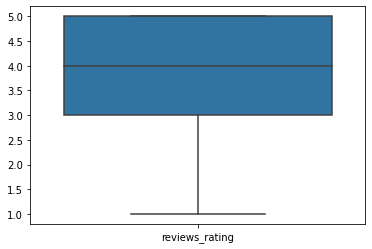

In [51]:
ax = sns.boxplot(data=df2[['reviews_rating']])

##### Судя по графикам, надо использовать микро-скоринги (несбалансированные графики)

<AxesSubplot:>

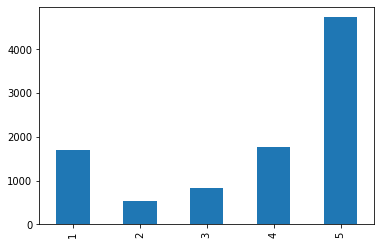

In [52]:
df2['reviews_rating'].value_counts().sort_index().plot.bar()

In [53]:
for ind, descr in tqdm(enumerate(df2['reviews'])):
    descr = [word.lower().strip().strip(punctuation) for word in nltk.word_tokenize(descr)]
    descr = [lemmatizer.lemmatize(w) for w in descr]
    descr = [word for word in descr if word != '' or word != ' ']
    descr = ' '.join([x for x in descr if x not in stopwords.words('english')])   
    df2['reviews'][ind] = descr
    if df2['reviews'][ind] == '':
        df2 = df2.drop(ind)

df2 = df2.reset_index(drop=True)

9575it [00:12, 762.84it/s] 


Попробовав разные варианты, я решил, что лучше ничего особо не чистить. Могут встречаться смайлики, а они вполне влияют на отзыв (например, смайлики ❤😍 показывают, что отзыв вероятно положительный).<br>
Было бы вообще интересно поизучать это.

In [54]:
def scoring2(predicted,  y2_test):
    acc = accuracy_score(predicted, y2_test)
    micro_f1 = f1_score(predicted, y2_test, average = 'micro')
    micro_p = precision_score(predicted, y2_test, average = 'micro')
    micro_r = recall_score(predicted, y2_test, average = 'micro')
    macro_f1 = f1_score(predicted, y2_test, average = 'macro')
    macro_p = precision_score(predicted, y2_test, average = 'macro')
    macro_r = recall_score(predicted, y2_test, average = 'macro')
    print('acc={0:1.4f}'.format(acc))
    print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
    print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

In [55]:
corpus2 = []
for row in df2['reviews']:
    corpus2.append(row)

In [56]:
y2 = np.array(df2['reviews_rating'])

### TF IDF

In [150]:
vect2 = TfidfVectorizer()
X2 = vect2.fit_transform(corpus2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42)

### CountVectorizer

In [151]:
from sklearn.feature_extraction.text import CountVectorizer
vect3 = CountVectorizer()
X3 = vect3.fit_transform(corpus2)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y2, random_state=42)

### KNN

In [136]:
from sklearn.neighbors import KNeighborsClassifier

In [152]:
def KNC_TFIDF(x_train, y_train):
    model = KNeighborsClassifier()
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

    space = dict()
    space['n_neighbors'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    space['weights'] = ['uniform', 'distance']
    space['p'] = [1, 2]
    space['metric'] = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski', 'seuclidean', 'mahalanobis']

    search = GridSearchCV(model, space, scoring='f1_micro', n_jobs=-1, cv=cv)
    result = search.fit(x_train, y_train)
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)

In [153]:
KNC(X2_train, y2_train)

Best Score: 0.6138045629692094
Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}


In [154]:
KNC(X3_train, y3_train)

Best Score: 0.6130596514788919
Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}


In [157]:
KNC_TFIDF = KNeighborsClassifier(metric='euclidean', n_neighbors=10, p=1, weights='distance').fit(X2_train, y2_train)
KNC_TFIDF_predicted = KNC_TFIDF.predict(X2_test)
scoring2(KNC_TFIDF_predicted, y2_test)

acc=0.6287
micro F1=0.6287, micro P=0.6287, micro R=0.6287
macro F1=0.4889, macro P=0.4480, macro R=0.6088



In [158]:
KNC_TFIDF_BoW = KNeighborsClassifier(metric='euclidean', n_neighbors=10, p=1, weights='distance').fit(X3_train, y3_train)
KNC_TFIDF_BoW_predicted = KNC_TFIDF_BoW.predict(X3_test)
scoring2(KNC_TFIDF_BoW_predicted, y3_test)

acc=0.6287
micro F1=0.6287, micro P=0.6287, micro R=0.6287
macro F1=0.4876, macro P=0.4504, macro R=0.5960



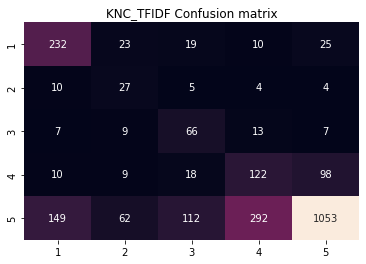

In [180]:
knc_cm = confusion_matrix(KNC_TFIDF_predicted, y2_test)
cm_df = pd.DataFrame(knc_cm,
                     index = [1, 2, 3, 4, 5], 
                     columns = [1, 2, 3, 4, 5])
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)
plt.title("KNC_TFIDF Confusion matrix")
plt.show()

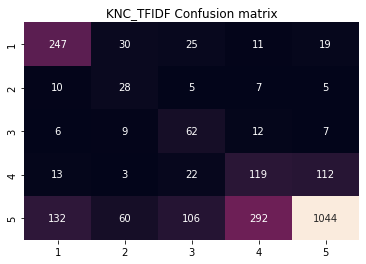

In [181]:
knc_cm = confusion_matrix(KNC_TFIDF_BoW_predicted, y2_test)
cm_df = pd.DataFrame(knc_cm,
                     index = [1, 2, 3, 4, 5], 
                     columns = [1, 2, 3, 4, 5])
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)
plt.title("KNC_TFIDF Confusion matrix")
plt.show()

На глаз получше будет TF IDF

# MultinomialNB

In [159]:
from sklearn.naive_bayes import MultinomialNB

def MNB(x_train, y_train):
    model = MultinomialNB()
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

    space = dict()
    space['class_prior'] = [None, 0, 1, 2]
    space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
    space['fit_prior'] = [True, False]

    search = GridSearchCV(model, space, scoring='f1_micro', n_jobs=-1, cv=cv)
    result = search.fit(x_train, y_train)
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)

In [160]:
MNB(X2_train, y2_train)

Best Score: 0.6219554178752732
Best Hyperparameters: {'alpha': 0.1, 'class_prior': None, 'fit_prior': True}


In [161]:
MNB(X3_train, y3_train)

Best Score: 0.6211172013164213
Best Hyperparameters: {'alpha': 1, 'class_prior': None, 'fit_prior': True}


In [162]:
MultinomialNB_TFIDF = MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True).fit(X2_train, y2_train)
MultinomialNB_TFIDF_predicted = MultinomialNB_TFIDF.predict(X2_test)
scoring2(MultinomialNB_TFIDF_predicted, y2_test)

acc=0.6442
micro F1=0.6442, micro P=0.6442, micro R=0.6442
macro F1=0.4513, macro P=0.4364, macro R=0.5312



In [163]:
MultinomialNB_BoW = MultinomialNB(alpha=1, class_prior=None, fit_prior=True).fit(X3_train, y3_train)
MultinomialNB_BoW_predicted = MultinomialNB_BoW.predict(X3_test)
scoring2(MultinomialNB_BoW_predicted, y3_test)

acc=0.6362
micro F1=0.6362, micro P=0.6362, micro R=0.6362
macro F1=0.4083, macro P=0.4040, macro R=0.5382



# Logistic Regression

Я тестировал разные параметры, убрал очень ресурсоемкие и незначительные

In [164]:
from sklearn.linear_model import LogisticRegression

def LR(x_train, y_train):
    model = LogisticRegression()
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

    space = dict()
    space['penalty'] = ['l1', 'l2', 'elasticnet']
    #space['dual'] = [True, False]
    space['C'] = [1e-2, 1e-1, 1, 10, 100]
    #space['fit_intercept'] = [True, False]
    space['solver'] = ['newton-cg', 'lbfgs', 'sag', 'saga']
    #space['warm_start'] = [True, False]
    #space['l1_ratio'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
 
    
    search = GridSearchCV(model, space, scoring='f1_micro', n_jobs=-1, cv=cv)
    result = search.fit(x_train, y_train)
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)

In [165]:
LR(X2_train, y2_train)

Best Score: 0.6305245514654882
Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


In [166]:
LR(X3_train, y3_train)

Best Score: 0.6304784194615893
Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}


In [167]:
Log_R_TFIDF = LogisticRegression(C=10, penalty='l2', solver='newton-cg').fit(X2_train, y2_train)
Log_R_TFIDF_predicted = Log_R_TFIDF.predict(X2_test)
scoring2(Log_R_TFIDF_predicted, y2_test)

acc=0.6391
micro F1=0.6391, micro P=0.6391, micro R=0.6391
macro F1=0.4639, macro P=0.4438, macro R=0.5499



In [168]:
Log_R_BoW = LogisticRegression(C=10, penalty='l2', solver='saga').fit(X3_train, y3_train)
Log_R_BoW_predicted = Log_R_BoW.predict(X3_test)
scoring2(Log_R_BoW_predicted, y3_test)

acc=0.6391
micro F1=0.6391, micro P=0.6391, micro R=0.6391
macro F1=0.4652, macro P=0.4460, macro R=0.5383



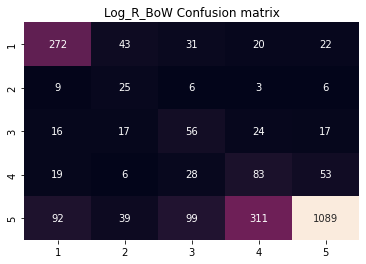

In [182]:
lr_cm = confusion_matrix(Log_R_TFIDF_predicted, y2_test)
cm_df = pd.DataFrame(lr_cm,
                     index = [1, 2, 3, 4, 5], 
                     columns = [1, 2, 3, 4, 5])
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)
plt.title("Log_R_BoW Confusion matrix")
plt.show()

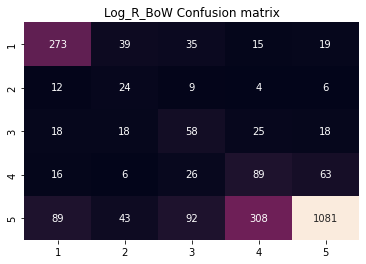

In [183]:
lr_cm = confusion_matrix(Log_R_BoW_predicted, y2_test)
cm_df = pd.DataFrame(lr_cm,
                     index = [1, 2, 3, 4, 5], 
                     columns = [1, 2, 3, 4, 5])
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)
plt.title("Log_R_BoW Confusion matrix")
plt.show()

На глаз будет получше BoW

# RidgeCl

In [169]:
from sklearn.linear_model import RidgeClassifier

In [170]:
def RidgeCl(x_train, y_train):
    model = RidgeClassifier()
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

    space = dict()
    space['alpha'] = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    space['fit_intercept'] = [True, False]
    space['normalize'] = [True, False]
    space['solver'] = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
    #space['warm_start'] = [True, False]
    #space['l1_ratio'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
 
    
    search = GridSearchCV(model, space, scoring='f1_micro', n_jobs=-1, cv=cv)
    result = search.fit(x_train, y_train)
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)

In [171]:
RidgeCl(X2_train, y2_train)

Best Score: 0.6279162713889181
Best Hyperparameters: {'alpha': 1, 'fit_intercept': True, 'normalize': False, 'solver': 'auto'}


In [172]:
RidgeCl(X3_train, y3_train)

Best Score: 0.6283357212663984
Best Hyperparameters: {'alpha': 1, 'fit_intercept': True, 'normalize': False, 'solver': 'sag'}


In [173]:
RC_TFIDF = RidgeClassifier(alpha=1, fit_intercept=True, solver='auto', normalize=False).fit(X2_train, y2_train)
RC_TFIDF_predicted = RC_TFIDF.predict(X2_test)
scoring2(RC_TFIDF_predicted, y2_test)

acc=0.6316
micro F1=0.6316, micro P=0.6316, micro R=0.6316
macro F1=0.4261, macro P=0.4125, macro R=0.5408



In [174]:
RC_BoW = RidgeClassifier(alpha=1, fit_intercept=True, solver='sag', normalize=False).fit(X3_train, y3_train)
RC_BoW_predicted = RC_BoW.predict(X3_test)
scoring2(RC_BoW_predicted, y3_test)

acc=0.6337
micro F1=0.6337, micro P=0.6337, micro R=0.6337
macro F1=0.4427, macro P=0.4243, macro R=0.5417



Визуализация

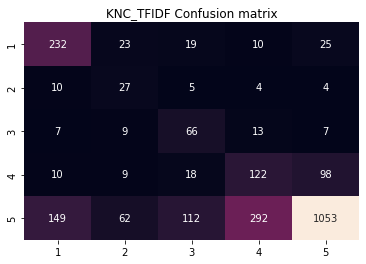

In [185]:
knc_cm = confusion_matrix(KNC_TFIDF_predicted, y2_test)
cm_df = pd.DataFrame(knc_cm,
                     index = [1, 2, 3, 4, 5], 
                     columns = [1, 2, 3, 4, 5])
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)
plt.title("KNC_TFIDF Confusion matrix")
plt.show()

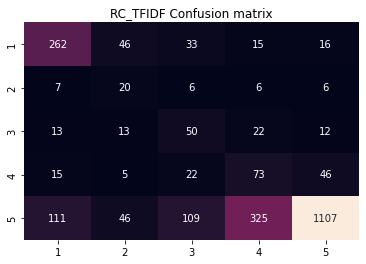

In [184]:
rc_cm = confusion_matrix(RC_BoW_predicted, y2_test)
cm_df = pd.DataFrame(rc_cm,
                     index = [1, 2, 3, 4, 5], 
                     columns = [1, 2, 3, 4, 5])
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)
plt.title("RC_TFIDF Confusion matrix")
plt.show()

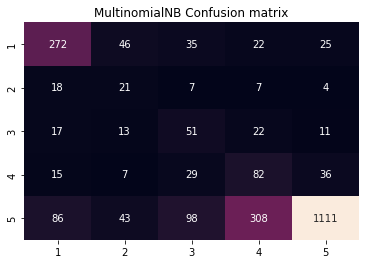

In [186]:
mnb_cm = confusion_matrix(MultinomialNB_TFIDF_predicted, y2_test)
cm_df = pd.DataFrame(mnb_cm,
                     index = [1, 2, 3, 4, 5], 
                     columns = [1, 2, 3, 4, 5])
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)
plt.title("MultinomialNB Confusion matrix")
plt.show()

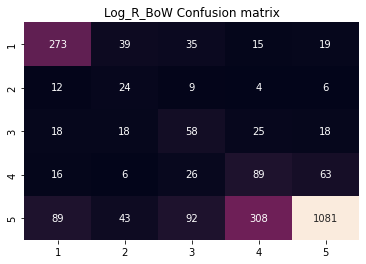

In [187]:
lr_cm = confusion_matrix(Log_R_BoW_predicted, y2_test)
cm_df = pd.DataFrame(lr_cm,
                     index = [1, 2, 3, 4, 5], 
                     columns = [1, 2, 3, 4, 5])
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)
plt.title("Log_R_BoW Confusion matrix")
plt.show()

Лучше всего справились <b>логистическая регрессия</b> и <b>MultinomialNB</b> - у них меньше всего неправильно предсказанных классов.

Наблюдения:<br>
* Разница между векторайзерами мизерная

Минусы:
* Неправильно предсказывается 4 звезды вместо 5 + вместо 1 звезды ставится 5
* Долгий серч

Плюсы:
* В основном они предсказывают правильно (то есть хорошо различает плохие отзывы и нормально хорошие)
* Хороший микро критерий

Что улучшить? <br>
* Нормализовать классы
* Не удалять стопслова
* Попробовать нграммы в OneVsRestClassifier
